# Домашнее задание по методу Ньютона и квазиньютоновским методам

##### Выполнил: ЖЕНЯ ЛАГУТИН

##### Баллов:   /30

В этом задании Вам предлагается погрузиться в специфику тестирования алгоритмов оптимизации на одинаковых классах задач на примере метода Ньютона и квазиньютоновских методов.

## Теория (10)
Приведем стандартные обозначения.

### Метод Ньютона:
$$
x_{k+1} = x_k - \left[ f_{xx}(x_k)\right]^{-1}\nabla f(x_k) = x_k - \left[ B(x_k)\right]^{-1}\nabla f(x_k) = x_k - H(x_k)\nabla f(x_k)
$$

### SR-1 (symmetric rank one) update
для квазиньютоновского метода использует следующую формулу для уточнения **обратного** гессиана:

$$
H_{k+1} = H_k + \dfrac{(\Delta x_k - H_k \Delta y_k)(\Delta x_k - H_k \Delta y_k)^\top}{\langle \Delta x_k - H_k \Delta y_k , \Delta y_k\rangle},  \quad \Delta y_k = \nabla f(x_{k+1}) - \nabla f(x_k), \quad \Delta x_k = x_{k+1} - x_k
$$

$$
x_{k+1} = x_k - H_k \nabla f (x_k)
$$

Оценка гессиана при этом:

$$
B_{k+1}=B_{k}+\frac {(\Delta y_k-B_k \Delta x_k) (\Delta y_k-B_k \Delta x_k)^\top}{(\Delta y_k-B_k \Delta x_k)^\top \Delta x_k}
$$

### BFGS
использует следующую формулу для уточнения **обратного** гессиана:
$$
H_{k+1} = H_k + \frac{(\Delta x_k^{\top}\Delta y_k+\Delta y_k^{\top}  H_k \Delta y_k)(\Delta x_k \Delta x_k^{\top})}{(\Delta x_k^{\top} \Delta y_k)^2} - \frac{ H_k \Delta y_k \Delta x_k^{\top} + \Delta x_k \Delta y_k^{\top} H_k}{\Delta x_k^{\top} \Delta y_k}.
$$
Оценка гессиана при этом:

$$
B_{k+1} = B_k + \frac{\Delta y_k \Delta y_k^{\top}}{\Delta y_k^{\top} \Delta x_k} - \frac{B_k \Delta x_k \Delta x_k^{\top} B_k^{\top} }{\Delta x_k^{\top} B_k \Delta x_k}
$$


Докажите, что для метода Ньютона обладает афинной инвариантностью, т.е. если есть преобразование координат $\tilde{f}(z) = f(x)$, где $x = Sz + s, \;\; s \in \mathbb{R}^n, S \in \mathbb{R}^{n \times n}$, то будет выполняться:

$$
\nabla \tilde{f}(z) = S^\top \nabla f(x), \qquad \nabla^2 \tilde{f}(z) = S^\top \nabla^2 f(x) S
$$

Покажите так же, что метод Ньютона и описанные выше оба квазиньютоновских метода запущенные независимо по координатам $x$ и $z$ будут работать так, что всегда будет выполняться связь $x_k = Sz_k + s$, если $x_0 = Sz_0 + s$ и инициализацией $B_0$ для метода по координате $x$ и $S^\top B_0 S$ для координаты $z$

### Решение

1. Непонятно при чём тут метод Ньютона, если это просто правила дифференцирования
$$\dfrac{\widetilde{f}(z)}{dz} = \dfrac{dx^{\top}}{dz}\dfrac{f(x)}{dx} = S^{\top}\nabla f(x)$$
$$ \nabla^2 \widetilde{f}(z) = \dfrac{d \nabla \widetilde{f}(z)}{dz} = \dfrac{d S^{\top}\nabla f(x)}{dz} = \dfrac{d S^{\top}\nabla f(x)}{dx^{\top}}\dfrac{dx}{dz^{\top}} = S^{\top} \nabla^2 f(x) S$$

2. Докажем по индукции:
   
   при n=0 доказано.
   
   Шаг: $x_{k+1} = Sz_k + s - [S~(\nabla^2\widetilde{f}(z_k))^{-1}~S^{\top})](S^{\top})^{-1} \nabla \widetilde{f}(z_k) = S(z_k - \widetilde H(z_k)) + s = Sz_{k+1} + s$
   
   Доказательство выполнено.

## Практика (20)
Реализуйте на языке python:
* метод Ньютона
* метод SR-1

для минимизации следующих функций:
* Квадратичная форма $f(x) = \dfrac{1}{2}x^\top A x + b^\top x, \quad x \in \mathbb{R}^n, A \in \mathbb{R}^{n \times n}$. Попробуйте n = 2, 50, 228
* Функция Розенброка $f(x, y) = (1-x)^2 + 100(y-x^2)^2 .\quad$

Сравните 2 реализованных Вами метода И [метод](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html) `BFGS` из библиотеки `scipy`, а так же его модификацию [L-BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) в решении задачи минимизации описанных выше функций. точку старта необходимо инициализировать одинаковую для всех методов в рамках одного запуска. Необходимо провести не менее 10 запусков для каждого метода на каждой функции до достижения того критерия остановки, который вы выберете (например, расстояние до точки оптимума - во всех задачах мы её знаем)

В качестве результата нужно заполнить следующие таблички, заполнив в них усредненное по числу запусков количество итераций, необходимых для сходимости и времени работы:

Критерий остановки `________`

Число запусков `_______`

P.S. если в силу каких то причин Вам не удалось сделать задание полностью, попробуйте сфокусироваться хотя бы на его части.

| Квадратичная форма. n = 2 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |            |      |
|            SR-1           |            |      |
|            BFGS           |            |      |
|           L-BFGS          |            |      |

| Квадратичная форма. n = 50 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |            |      |
|            SR-1           |            |      |
|            BFGS           |            |      |
|           L-BFGS          |            |      |


| Квадратичная форма. n = 228 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |            |      |
|            SR-1           |            |      |
|            BFGS           |            |      |
|           L-BFGS          |            |      |

| Функция Розенброка | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |            |      |
|            SR-1           |            |      |
|            BFGS           |            |      |
|           L-BFGS          |            |      |

In [1]:
import numpy as np
from scipy.optimize import minimize
import time
import pandas
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# test functions, their gradients and hessians
def qaudratic(A, b, x):
    return x.dot(A @ x) / 2 + b.dot(x) 

def nabla_quadratic(A, b, x):
    return 0.5 * (A + np.transpose(A)) @ x + b

def hess_quadratic(A, b, x):
    return (A + np.transpose(A))

def rosen(vec):
    x, y = vec
    return (1 - x)**2 + 100 * (y - x**2)**2

def nabla_rosen(vec):
    x, y = vec
    dx = - 2 * (1 - x) - 400 * (y - x**2) * x
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

def hess_rosen(vec):
    x, y = vec
    dxx = 2 - 400 * y + 1200 * x**2
    dxy = -400 * x
    dyy = 200
    return np.array([[dxx, dxy], [dxy, dyy]])

In [3]:
def newton(f, df, ddf, x0, criteria):
    x = [x0]
    h = np.eye(x0.shape[0], x0.shape[0])
    df_ = df(x0)
    while not criteria(x[-1]):
        df_ = df(x[-1])
        h = np.linalg.inv(ddf(x[-1]))
        dx = -h @ df_
        x.append(x[-1] + dx)
    res = {}
    res['fun'] = f(x[-1])
    res['jac'] = df_
    res['nit'] = len(x) - 1
    res['x'] = x[-1]
    return res

In [4]:
def sr1_hess_step(dx, dy, h):
    s = dx - h @ dy
    return np.outer(s,s) / s.dot(dy)

def sr1(f, df, x0, criteria):
    x = [x0]
    h = np.eye(x0.shape[0], x0.shape[0])
    df_ = df(x0)
    while not criteria(x[-1]):
        dx = -h @ df_
        x.append(x[-1] + dx)
        dy = df(x[-1]) - df_
        df_ = df_ + dy
        h = h + sr1_hess_step(dx, dy, h)
    res = {}
    res['fun'] = f(x[-1])
    res['jac'] = df_
    res['nit'] = len(x) - 1
    res['x'] = x[-1]
    return res

In [5]:
def bfgs_hess_step(dx, dy, h):
    xy = dx.dot(dy)
    hy = h @ dy
    dh = (xy + dy.dot(hy)) * np.outer(dx, dx) / (xy)**2 - (hy @ dx.transpose() + np.outer(dx, (dy.transpose() @ h))) / xy
    return dh

def bfgs(f, df, x0, criteria):
    x = [x0]
    h = np.eye(x0.shape[0], x0.shape[0])
    df_ = df(x0)
    while not criteria(x[-1]):
        dx = -h @ df_
        x.append(x[-1] + dx)
        dy = df(x[-1]) - df_
        df_ = df_ + dy
        h = h + bfgs_hess_step(dx, dy, h)
        print(np.linalg.norm(x_sol - x[-1]))
    res = {}
    res['fun'] = f(x[-1])
    res['jac'] = df_
    res['nit'] = len(x) - 1
    res['x'] = x[-1]
    return res

In [6]:
def generate_SPD(n, cond=5):
    d = np.random.rand(n - 2)
    a = np.array([1, cond])
    d = np.concatenate((d, a))
    D = np.diag(d)
    u = np.random.rand(n)
    v = D @ u
    t = 2 / u.dot(u)
    s = t**2 * u.dot(v) / 2
    w = t * v - s * u
    A = D - np.outer(u, w) - np.outer(w, u)
    return A    

In [7]:
#n = 2
#COND = 3
#EPSILON = 1e-5
#A = generate_SPD(n, COND)
#b = np.random.rand(n)
#x_sol = - 2 * np.linalg.inv(A + A.transpose()) @ b
#x0 = np.random.randn(n)
#
#quadr_f = lambda x:  qaudratic(A, b, x)
#dquadr_f = lambda x: nabla_quadratic(A, b, x)
#ddquadr_f = lambda x: hess_quadratic(A, b, x)
#
#quadr_crit1 = lambda x: np.linalg.norm(x - x_sol) < EPSILON
#quadr_crit2 = lambda x: np.linalg.norm(dquadr_f(x)) < EPSILON

In [8]:
#x = minimize(quadr_f, x0, method='L-BFGS-B', jac=dquadr_f, options = {'gtol':EPSILON})
#print(np.linalg.norm(x['x'] - x_sol))
#print(np.linalg.norm(x['jac']))

In [9]:
#x = sr1(quadr_f, dquadr_f, x0, quadr_crit2)
#print(np.linalg.norm(x['x'] - x_sol))
#print(np.linalg.norm(x['jac']))

In [10]:
#x = newton(quadr_f, dquadr_f, ddquadr_f, x0, quadr_crit2)
#print(np.linalg.norm(x['x'] - x_sol))
#print(np.linalg.norm(x['jac']))

In [11]:
# ROSENBROCK FUNCTION
EPSILON = 1e-5
ROSEN_N_STARTS = 30
rosen_crit1 = lambda x: np.linalg.norm(x - np.array([1, 1])) < EPSILON
rosen_crit2 = lambda x: np.linalg.norm(nabla_rosen(x)) < EPSILON

rosen_time = {}
rosen_nit = {}
methods = ['BFGS', 'L-BFGS-B', 'sr1', 'newton']
for method in methods:
    rosen_time[method] = []
    rosen_nit[method] = []
    
for i in range(ROSEN_N_STARTS):
    x0 = np.random.rand(2) * 10
    for method in ['BFGS', 'L-BFGS-B']:
        start = time.time()
        x = minimize(rosen, x0, method=method, jac=nabla_rosen, options = {'gtol':EPSILON})
        rosen_time[method].append(time.time() - start)
        rosen_nit[method].append(x['nit'])
    
    start = time.time()
    x = sr1(rosen, nabla_rosen, x0, rosen_crit2)
    rosen_time['sr1'].append(time.time() - start)
    rosen_nit['sr1'].append(x['nit'])
    
    start = time.time()
    x = newton(rosen, nabla_rosen, hess_rosen, x0, rosen_crit2)
    rosen_time['newton'].append(time.time() - start)
    rosen_nit['newton'].append(x['nit'])

In [12]:
#QUADRATIC FUNCTION
n = [2, 50, 282]
COND = 3
EPSILON = 1e-5
QUADR_N_STARTS = 30
#quadr_crit1 = lambda x: np.linalg.norm(x - x_sol) < EPSILON
quadr_crit2 = lambda x: np.linalg.norm(dquadr_f(x)) < EPSILON

quadr_time = {}
quadr_nit = {}
methods = ['BFGS', 'L-BFGS-B', 'sr1', 'newton']
for ni in n:
    quadr_time[ni] = {}
    quadr_nit[ni] = {}
    for method in methods:
        quadr_time[ni][method] = []
        quadr_nit[ni][method] = []
        
for ni in n:
    for i in range(QUADR_N_STARTS):       
        A = generate_SPD(ni, COND)
        b = np.random.rand(ni)
        #x_sol = - 2 * np.linalg.inv(A + A.transpose()) @ b
        x0 = np.random.randn(ni)        
        quadr_f = lambda x:  qaudratic(A, b, x)
        dquadr_f = lambda x: nabla_quadratic(A, b, x)
        ddquadr_f = lambda x: hess_quadratic(A, b, x)
        for method in ['BFGS', 'L-BFGS-B']:
            start = time.time()
            x = minimize(quadr_f, x0, method=method, jac=dquadr_f, options = {'gtol':EPSILON})
            quadr_time[ni][method].append(time.time() - start)
            quadr_nit[ni][method].append(x['nit'])
    
        start = time.time()
        x = sr1(quadr_f, dquadr_f, x0, quadr_crit2)
        quadr_time[ni]['sr1'].append(time.time() - start)
        quadr_nit[ni]['sr1'].append(x['nit'])
        
        start = time.time()
        x = newton(quadr_f, dquadr_f, ddquadr_f, x0, quadr_crit2)
        quadr_time[ni]['newton'].append(time.time() - start)
        quadr_nit[ni]['newton'].append(x['nit'])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
data = {}
columns = ['Method', 'n', 'Avg n of iterations', 'Avg time']
data['quadr'] = []
for ni in n:
    for m in methods:
        data['quadr'].append([m, ni, int(np.mean(quadr_nit[ni][m])), np.round(np.mean(quadr_time[ni][m]), 5)])
sort_f = lambda x: x[1] + x[3]
data['quadr'].sort(key=sort_f)
df_q = pandas.DataFrame(np.array(data['quadr']), columns=columns)

columns = ['Method', 'Avg n of iterations', 'Avg time']
data['rosen'] = []
for m in methods:
    data['rosen'].append([m, int(np.mean(rosen_nit[m])), np.mean(rosen_time[m])])
sort_f = lambda x: x[1]
data['rosen'].sort(key=sort_f)
df_r = pandas.DataFrame(np.array(data['rosen']), columns=columns)

### Критерий остановки:
$\|\nabla f(x)\| = \|Ax - b\| < \epsilon$

### Quadratic function. 
Number of starts for each combination 'method-n' is 30. Epsilon is 1e-5

In [14]:
df_q

,Method,n,Avg n of iterations,Avg time
0,sr1,2,2,0.0002
1,L-BFGS-B,2,5,0.0003
2,BFGS,2,3,0.00087
3,newton,2,18,0.001
4,sr1,50,32,0.00277
5,L-BFGS-B,50,42,0.00311
6,newton,50,19,0.00344
7,BFGS,50,51,0.00963
8,L-BFGS-B,282,98,0.04225
9,sr1,282,79,0.09994


### Rosenbrock function. 
Number of starts for each method is 30. Epsilon is 1e-5

In [15]:
df_r

,Method,Avg n of iterations,Avg time
0,newton,4,0.0005219300587972005
1,L-BFGS-B,33,0.0012047449747721354
2,BFGS,57,0.006694308916727702
3,sr1,70244,2.4861295859018964


In [16]:
def plot_(dict_, title, ylabel):
    for method in dict_:
        trend = dict_[method]
        plt.plot(trend, label=method)
        #plt.fill_between(list(range(len(trend))), trend-np.std(trend), trend+np.std(trend), alpha=0.2)
    plt.yscale('log', nonposy='clip')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
    plt.clf()

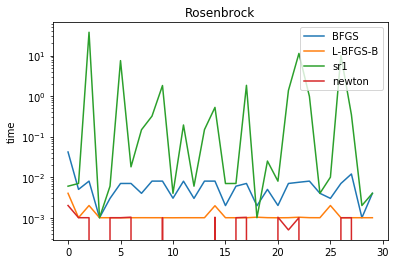

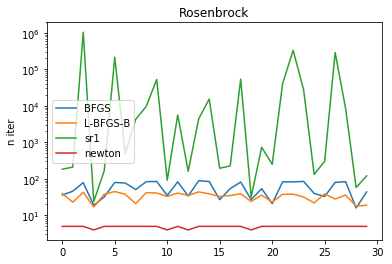

<Figure size 432x288 with 0 Axes>

In [17]:
plot_(rosen_time, 'Rosenbrock', 'time')
plot_(rosen_nit, 'Rosenbrock', 'n iter')

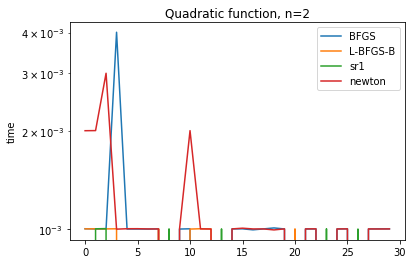

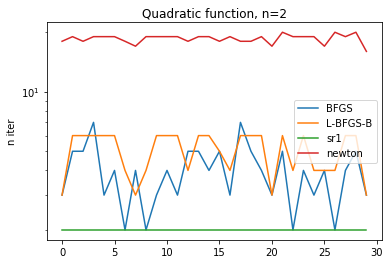

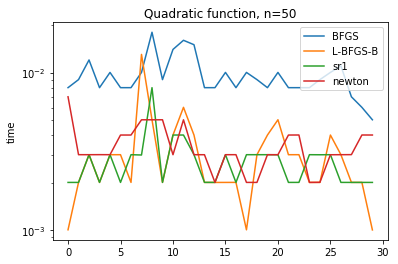

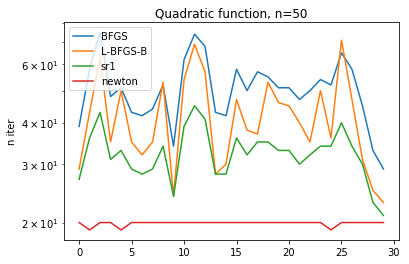

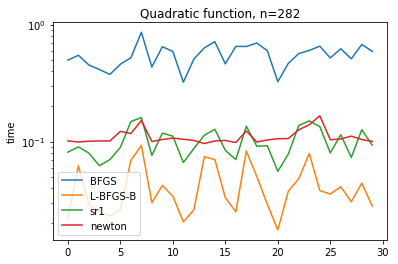

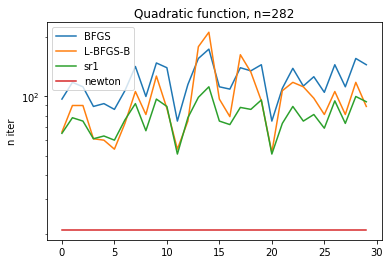

<Figure size 432x288 with 0 Axes>

In [18]:
for ni in n:
    plot_(quadr_time[ni], 'Quadratic function, n=' + str(ni), 'time')
    plot_(quadr_nit[ni], 'Quadratic function, n=' + str(ni), 'n iter')

In [17]:
# # Измерение времени работы
# import time
# start = time.time()
# # метод
# end = time.time()
# work_time = end - start

# # Рисование mean и std имея массив средних по запускам и стандартных отклонений
# plt.plot(trend, label="Method1")
# plt.fill_between(list(range(len(trend))), trend-std, trend+std, alpha=0.2)

# plt.yscale('log', nonposy='clip')
# plt.legend()
# plt.savefig('Iteration_comparison.pdf')
# plt.show()
# plt.clf()